In [103]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("bmh")

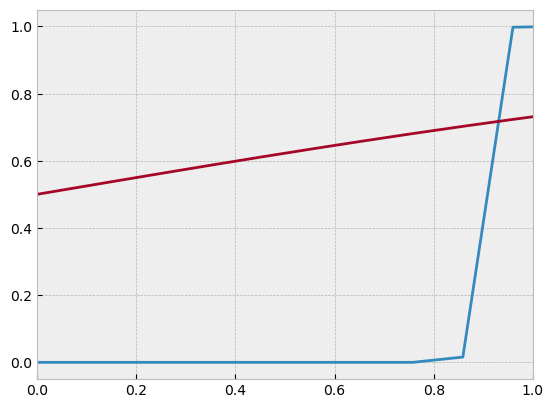

In [116]:
def sigmoid(x, alpha, beta): 
    return 1/(1 + np.exp(- alpha * (x + beta)))

x = np.linspace(-5, 5, 100)
plt.plot(x, sigmoid(x, 100, -0.9))
plt.plot(x, sigmoid(x, 1, 0))
plt.xlim(0, 1)
plt.show()

In [121]:
response_time = pd.read_csv("../data/response_time.csv")
response_time["ts"] = pd.to_datetime(response_time["ts"])
response_time["ts"].min(), response_time["ts"].max()
response_time["relative_ts_s"] = (response_time["ts"] - response_time["ts"].min()).dt.total_seconds()
response_time

,ts,duration_ms,relative_ts_s
0,2024-02-08 18:12:55.045314178+00:00,357,0.000000
1,2024-02-08 18:12:55.479522694+00:00,293,0.434209
2,2024-02-08 18:12:55.980149448+00:00,292,0.934835
3,2024-02-08 18:12:56.474204270+00:00,287,1.428890
4,2024-02-08 18:12:56.983316146+00:00,293,1.938002
...,...,...,...
405,2024-02-08 18:14:53.883303921+00:00,296,118.837990
406,2024-02-08 18:14:54.138864366+00:00,299,119.093550
407,2024-02-08 18:14:54.386521853+00:00,297,119.341208
408,2024-02-08 18:14:54.635329639+00:00,295,119.590015


In [122]:
metrics = pd.read_csv("../data/metric.csv")
metrics["ts"] = pd.to_datetime(metrics["ts"])
metrics["relative_ts_s"] = (metrics["ts"] - response_time["ts"].min()).dt.total_seconds()
metrics

,ts,36314.runtime,36314.rq_time,36314.run_periods,36416.runtime,36416.rq_time,36416.run_periods,36417.runtime,36417.rq_time,36417.run_periods,relative_ts_s
0,2024-02-08 18:12:45.169182067+00:00,68799868,2513560,1032,153474618203,22844638439,3150,152069382556,17559970915,2486,-9.876132
1,2024-02-08 18:12:46.203922399+00:00,68799868,2513560,1032,153474618203,22844638439,3150,152069382556,17559970915,2486,-8.841392
2,2024-02-08 18:12:47.209898839+00:00,68799868,2513560,1032,153474618203,22844638439,3150,152069382556,17559970915,2486,-7.835415
3,2024-02-08 18:12:48.210343618+00:00,68799868,2513560,1032,153474618203,22844638439,3150,152069382556,17559970915,2486,-6.834971
4,2024-02-08 18:12:49.210678232+00:00,68799868,2513560,1032,153474618203,22844638439,3150,152069382556,17559970915,2486,-5.834636
...,...,...,...,...,...,...,...,...,...,...,...
130,2024-02-08 18:14:55.265723811+00:00,83337392,2859780,1442,214569275971,25948352418,3865,213893450874,21487918769,3297,120.220410
131,2024-02-08 18:14:56.266180945+00:00,83337392,2859780,1442,214569275971,25948352418,3865,213893450874,21487918769,3297,121.220867
132,2024-02-08 18:14:57.266642658+00:00,83337392,2859780,1442,214569275971,25948352418,3865,213893450874,21487918769,3297,122.221328
133,2024-02-08 18:14:58.267078273+00:00,83337392,2859780,1442,214569275971,25948352418,3865,213893450874,21487918769,3297,123.221764


In [134]:
metrics["36416.runtime.second"] = metrics["36416.runtime"].diff(periods=1).dropna()/1e9
metrics["36417.runtime.second"] = metrics["36417.runtime"].diff(periods=1).dropna()/1e9
metrics["36416.runtime.saturation"] = sigmoid(metrics["36416.runtime.second"], 100, -0.9)
metrics["36417.runtime.saturation"] = sigmoid(metrics["36417.runtime.second"], 100, -0.9)

metrics["36416.rq_time.second"] = metrics["36416.rq_time"].diff().dropna()/1e9
metrics["36417.rq_time.second"] = metrics["36417.rq_time"].diff().dropna()/1e9

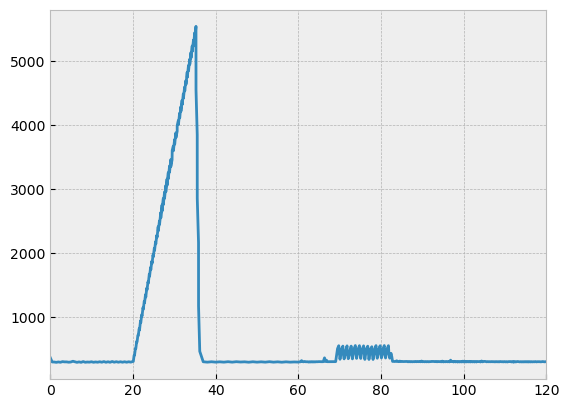

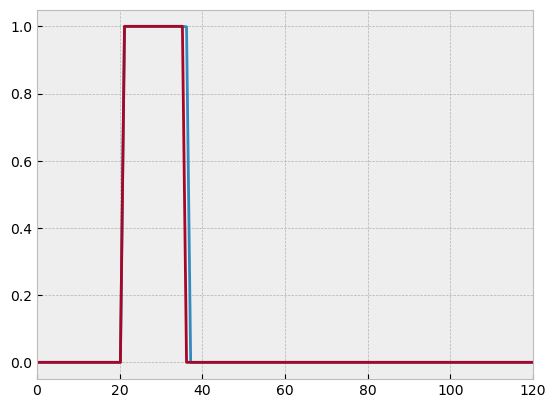

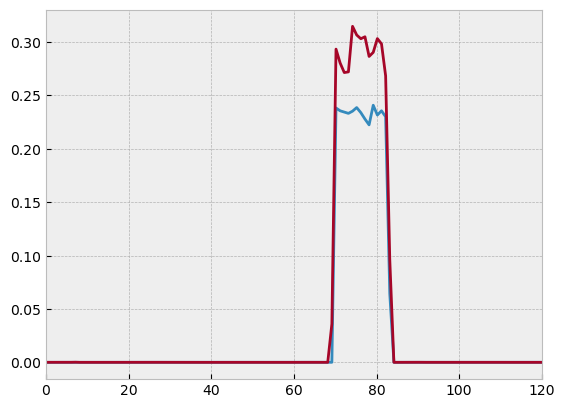

In [135]:
plt.plot(response_time["relative_ts_s"], response_time["duration_ms"])
plt.xlim(0, 120)
plt.show()

plt.plot(metrics["relative_ts_s"], metrics["36416.runtime.saturation"])
plt.plot(metrics["relative_ts_s"], metrics["36417.runtime.saturation"])
plt.xlim(0, 120)
plt.show()

plt.plot(metrics["relative_ts_s"], metrics["36416.rq_time.second"])
plt.plot(metrics["relative_ts_s"], metrics["36417.rq_time.second"])
plt.xlim(0, 120)
plt.show()